## ML2021 - Assesment Work (Regression)

The challenge is to predict Workers Compensation claims using realistic data.

**Model Evaluation**: MSE, $R^2$, ...

## Data Loading 




1. Download the train data

In [ ]:
!wget https://github.com/curso-iabd-uclm/machinelearning/raw/main/insurance/train.csv

--2022-01-02 22:52:29--  https://github.com/curso-iabd-uclm/machinelearning/raw/main/insurance/train.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/curso-iabd-uclm/machinelearning/main/insurance/train.csv [following]
--2022-01-02 22:52:30--  https://raw.githubusercontent.com/curso-iabd-uclm/machinelearning/main/insurance/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4942050 (4.7M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   4.71M  --.-KB/s    in 0.06s   

2022-01-02 22:52:30 (85.2 MB/s) - ‘train.csv’ saved [4942050/4942050]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn import linear_model
from sklearn import tree 

from IPython.display import Image
import pydot
from io import StringIO

from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn import preprocessing 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
import sklearn.cluster
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import DBSCAN
import sklearn.neighbors
from sklearn.cluster import KMeans
from sklearn import metrics

Los datos son sobre reclamaciones


In [ ]:

df = pd.read_csv("train.csv")
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


Tenemos que predecir la ultima fila (ultimate incurred claim cost)

The training set containing 30,000 insurance policies that you can use to train your model.

**Data fields**

-  ClaimNumber: Unique policy identifier
- DateTimeOfAccident: Date and time of accident
- DateReported: Date that accident was reported
- Age: Age of worker
- Gender: Gender of worker
- MaritalStatus: Martial status of worker. (M)arried, (S)ingle, (U)unknown.
- DependentChildren: The number of dependent children
- DependentsOther: The number of dependants excluding children
- WeeklyWages: Total weekly wage / Sueldo semanal
- PartTimeFullTime: Binary (P) or (F)
- HoursWorkedPerWeek: Total hours worked per week
- DaysWorkedPerWeek: Number of days worked per week
- ClaimDescription: Free text description of the claim / Descripcion que vamos a usar para el improvement.
- InitialIncurredClaimCost: Initial estimate by the insurer of the claim cost
- **UltimateIncurredClaimCost**: Total claims payments by the insurance company. This is the field you are asked to predict in the test set.
// 
Total de siniestros pagados por la compañía de seguros

In [ ]:
df.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

## Preprocessing

We transform the data in order to allow us the posterior use of the algorithms to build prediction models, for example, missing values, from categories to numbers, ...



### Missing Values

It is necessary to address the missing values to improve the quality of the data that will be used to generate the models.


In [ ]:
df.shape

(36176, 15)

In [ ]:
pd.isnull(df).any()

ClaimNumber                  False
DateTimeOfAccident           False
DateReported                 False
Age                          False
Gender                       False
MaritalStatus                 True
DependentChildren            False
DependentsOther              False
WeeklyWages                   True
PartTimeFullTime             False
HoursWorkedPerWeek            True
DaysWorkedPerWeek            False
ClaimDescription             False
InitialIncurredCalimsCost    False
UltimateIncurredClaimCost    False
dtype: bool

In [ ]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
df.shape

(36049, 15)

In [ ]:
df.drop_duplicates()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36171,WC5624756,1996-05-29T09:00:00Z,1996-06-27T00:00:00Z,20,F,S,0,0,344.16,F,40.0,5,WALKED INTO DOOR BRUISED LEFT KNEE PAIN,1400,1343.054886
36172,WC8516685,2002-10-08T08:00:00Z,2003-02-07T00:00:00Z,35,M,M,0,0,1668.83,F,71.0,7,LIFTING HOT WATER FROM TRAY BURN LEFT WRIST,1000,172876.632600
36173,WC6891668,1999-09-22T09:00:00Z,1999-11-11T00:00:00Z,52,F,M,0,0,204.87,P,20.0,4,REMOVING BROKEN GLASS LACERATED LEFT THUMB,500,632.281472
36174,WC4287842,1993-02-05T06:00:00Z,1993-03-19T00:00:00Z,28,M,M,0,0,730.87,F,38.0,5,FELL OVER SPRAINED ANKLE AND KNEE INJURY,4000,6714.495760


### OneHotEncoding 

[OneHotEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

Transforma categorias categóricas en categorias numericas

In [ ]:
df['Gender'].values

array(['M', 'F', 'M', ..., 'F', 'M', 'M'], dtype=object)

In [ ]:
df_OneHot = pd.get_dummies(df[['Gender','MaritalStatus', 'PartTimeFullTime']])
df_OneHot

,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0
2,0,1,0,0,0,1,1,0
3,0,1,0,0,1,0,1,0
4,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
36171,1,0,0,0,1,0,1,0
36172,0,1,0,1,0,0,1,0
36173,1,0,0,1,0,0,0,1
36174,0,1,0,1,0,0,1,0


> At the begining only the numerical and the encoded features must be considered.

> At the end of the work you can include text, date information and so on.

In [ ]:
df = pd.concat([df, df_OneHot], axis = 1)
df = df.loc[:,~df.columns.duplicated()]
df

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,0,1,0,1,0,0,1,0
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,1,0,0,1,0,0,1,0
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,0,1,0,0,0,1,1,0
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,0,1,0,0,1,0,1,0
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36171,WC5624756,1996-05-29T09:00:00Z,1996-06-27T00:00:00Z,20,F,S,0,0,344.16,F,40.0,5,WALKED INTO DOOR BRUISED LEFT KNEE PAIN,1400,1343.054886,1,0,0,0,1,0,1,0
36172,WC8516685,2002-10-08T08:00:00Z,2003-02-07T00:00:00Z,35,M,M,0,0,1668.83,F,71.0,7,LIFTING HOT WATER FROM TRAY BURN LEFT WRIST,1000,172876.632600,0,1,0,1,0,0,1,0
36173,WC6891668,1999-09-22T09:00:00Z,1999-11-11T00:00:00Z,52,F,M,0,0,204.87,P,20.0,4,REMOVING BROKEN GLASS LACERATED LEFT THUMB,500,632.281472,1,0,0,1,0,0,0,1
36174,WC4287842,1993-02-05T06:00:00Z,1993-03-19T00:00:00Z,28,M,M,0,0,730.87,F,38.0,5,FELL OVER SPRAINED ANKLE AND KNEE INJURY,4000,6714.495760,0,1,0,1,0,0,1,0


### Train and test split

Caracteristicas para probar, podemos probar diferentes caracteristicas para probar los resultados

In [ ]:
x_features = ['WeeklyWages', 'HoursWorkedPerWeek', 'InitialIncurredCalimsCost']

In [ ]:

X = df[x_features]
y = df['UltimateIncurredClaimCost']
# Se puede cambiar el test_size (hay que)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## Basic Modeling 

We’ll be exploring Linear Regression using scikit-learn in python.

We will use the selected features to predict the results. 

Linear regression produces a model in the form:


 $$
 Y_{t}=\beta _{0}+\beta _{1}X_{1}+\beta _{2}X_{2}+\cdots +\beta _{p}X_{p}+\varepsilon
 $$

The way this is accomplished is by minimising the residual sum of squares, given by the equation below:
$$
RSS=Σni=1(yi–y^i)2
$$

$$
RSS=Σni=1(yi–β0^–β1^x1–β2^x2–…–βp^xp)
$$


Scikit-learn provides a LinearRegression function for doing this job.
Linear Regression (Dummy Model)

In [ ]:

model = linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Now that our model is trained, we can view the coefficients of the model using regression_model.coef_, which is an array of tuples of coefficients.

In [ ]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

The coefficient for WeeklyWages is 9.794779343746388
The coefficient for HoursWorkedPerWeek is -25.675661234818307
The coefficient for InitialIncurredCalimsCost is 0.7743349854415342


Note that, because we’ve not done any feature scaling or dimensionality reduction, we can’t say anything about the relative importance of each of our features given these coefficients because the features are not of the same scale.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Evaluacion
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test)) # penalizar altas diferencias
print ("R^2:", metrics.r2_score(y_pred , y_test)) # importante mide nuestro resultado en funcion al real


MAE: 7979.755264779615
MAPE: 0.8024366465210745
MSE: 547594288.9830517
R^2: -1.5990659116870134


# 1. BaseLine (kNN or DecisionTrees)

- Feature Selection
- CrossValidation 
   - kNN: k, weights, metric (manhattan, euclidean)
   - Decisiontrees: max_depth


## Feature Selection and Dimensionality Reduction

Low correlation means there's no linear relationship; it doesn't mean there's no information in the feature that predicts the target.

In [ ]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

df_regressor = df.drop(labels=['ClaimNumber', 'DateReported', 'ClaimDescription', 'Gender','MaritalStatus','PartTimeFullTime'], axis=1)
df_regressor.head(4)

,DateTimeOfAccident,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F
0,2002-04-09T07:00:00Z,48,0,0,500.00,38.0,5,1500,4748.203388,0,0,1,0,0,1
1,1999-01-07T11:00:00Z,43,0,0,509.34,37.5,5,5500,6326.285819,1,0,1,0,0,1
2,1996-03-25T00:00:00Z,30,0,0,709.10,38.0,5,1700,2293.949087,0,0,0,0,1,1
3,2005-06-22T13:00:00Z,41,0,0,555.46,38.0,5,15000,17786.487170,0,0,0,1,0,1


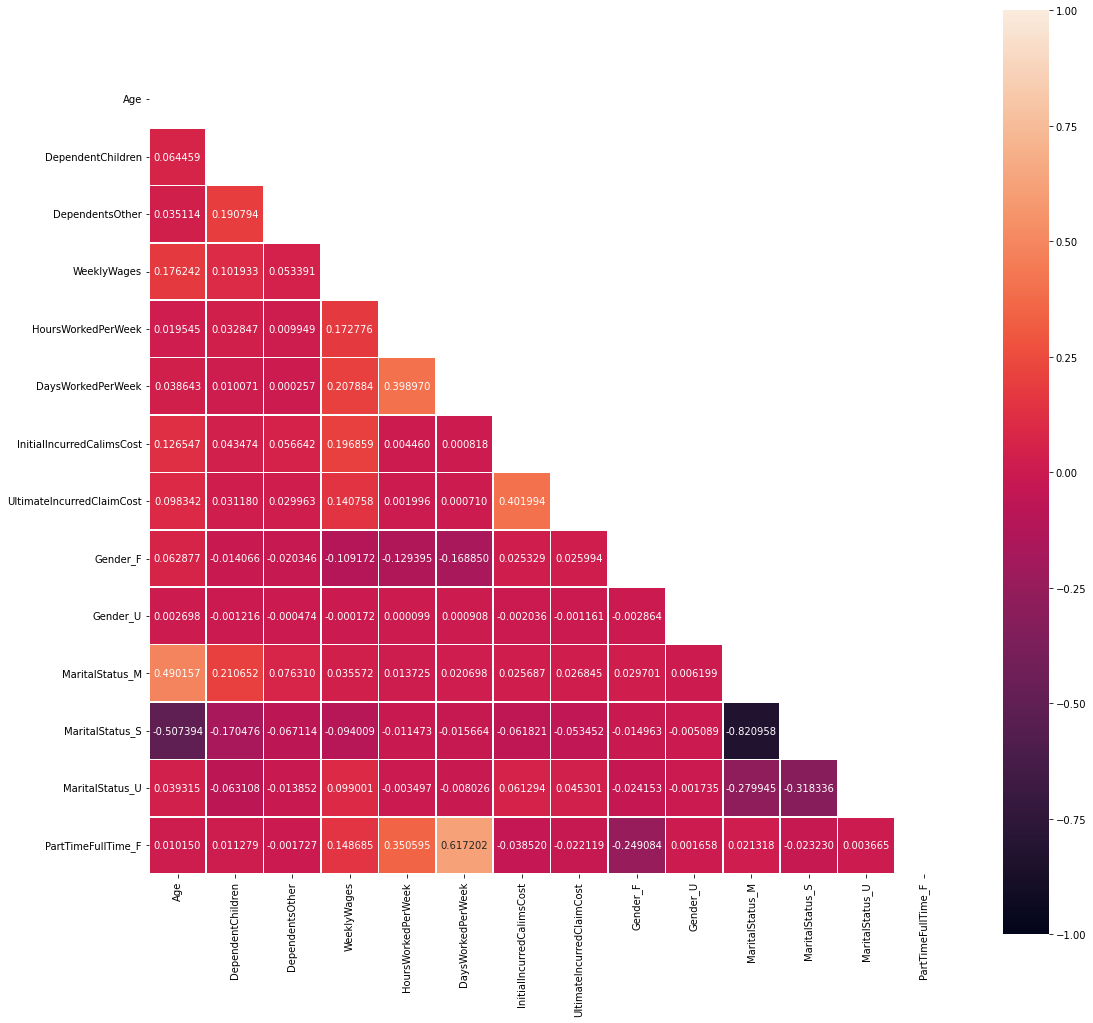

In [ ]:
fig, ax = plt.subplots(figsize=(18, 17))


# adjust mask and df
mask = np.triu(np.ones_like(df_regressor.corr(), dtype=np.bool))
corr = df_regressor.iloc[0:,:-1].copy()
# plot heatmap
sns.heatmap(df_regressor.corr(), mask=mask,annot=True, square=True, linecolor='white', 
            fmt="f", linewidths=.5,  ax=ax, vmin=-1, vmax=1)
# yticks
plt.yticks(rotation=0)
plt.show()

In [ ]:
def remove_outlier(df):
  upper_limit = df['UltimateIncurredClaimCost'].mean() + 3*df['UltimateIncurredClaimCost'].std()
  lower_limit = df['UltimateIncurredClaimCost'].mean() - 3*df['UltimateIncurredClaimCost'].std()

  new_df = df[(df['UltimateIncurredClaimCost'] < upper_limit) & (df['UltimateIncurredClaimCost'] > lower_limit)]
  return new_df

In [ ]:
df_regressor.shape

(36049, 15)

In [ ]:
df_regressor = remove_outlier(df_regressor)
df_regressor

,DateTimeOfAccident,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F
0,2002-04-09T07:00:00Z,48,0,0,500.00,38.0,5,1500,4748.203388,0,0,1,0,0,1
1,1999-01-07T11:00:00Z,43,0,0,509.34,37.5,5,5500,6326.285819,1,0,1,0,0,1
2,1996-03-25T00:00:00Z,30,0,0,709.10,38.0,5,1700,2293.949087,0,0,0,0,1,1
3,2005-06-22T13:00:00Z,41,0,0,555.46,38.0,5,15000,17786.487170,0,0,0,1,0,1
4,1990-08-29T08:00:00Z,36,0,0,377.10,38.0,5,2800,4014.002925,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36170,1996-06-10T05:00:00Z,21,0,0,456.00,38.0,5,13000,7914.441586,0,0,0,1,0,1
36171,1996-05-29T09:00:00Z,20,0,0,344.16,40.0,5,1400,1343.054886,1,0,0,1,0,1
36173,1999-09-22T09:00:00Z,52,0,0,204.87,20.0,4,500,632.281472,1,0,1,0,0,0
36174,1993-02-05T06:00:00Z,28,0,0,730.87,38.0,5,4000,6714.495760,0,0,1,0,0,1


In [ ]:
features_selected = ['WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren', 'HoursWorkedPerWeek', 'UltimateIncurredClaimCost'] # 'HoursWorkedPerWeek',  'Age'


In [ ]:
df_regressor = df_regressor.set_index('DateTimeOfAccident')

In [ ]:
df_regressor = df_regressor[features_selected]
df_regressor

,WeeklyWages,InitialIncurredCalimsCost,Age,DependentChildren,HoursWorkedPerWeek,UltimateIncurredClaimCost
DateTimeOfAccident,,,,,,
2002-04-09T07:00:00Z,500.00,1500,48,0,38.0,4748.203388
1999-01-07T11:00:00Z,509.34,5500,43,0,37.5,6326.285819
1996-03-25T00:00:00Z,709.10,1700,30,0,38.0,2293.949087
2005-06-22T13:00:00Z,555.46,15000,41,0,38.0,17786.487170
1990-08-29T08:00:00Z,377.10,2800,36,0,38.0,4014.002925
...,...,...,...,...,...,...
1996-06-10T05:00:00Z,456.00,13000,21,0,38.0,7914.441586
1996-05-29T09:00:00Z,344.16,1400,20,0,40.0,1343.054886
1999-09-22T09:00:00Z,204.87,500,52,0,20.0,632.281472


In [ ]:
# rest index avoid problems in cross validation
X = df_regressor[['WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','HoursWorkedPerWeek']]
y = df_regressor['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=40)

In [ ]:
X_train.reset_index(drop = True, inplace = True)
X_train.head(3)

,WeeklyWages,InitialIncurredCalimsCost,Age,DependentChildren,HoursWorkedPerWeek
0,503.88,23500,62,0,38.0
1,14.75,10000,48,0,40.0
2,179.97,1500,19,0,38.0


In [ ]:
X_test.head()

,WeeklyWages,InitialIncurredCalimsCost,Age,DependentChildren,HoursWorkedPerWeek
DateTimeOfAccident,,,,,
1999-06-10T06:00:00Z,200.00,1500,31,0,40.0
1995-09-23T10:00:00Z,608.00,2200,41,0,38.0
2002-08-07T11:00:00Z,500.00,11000,28,0,38.0
1998-11-18T07:00:00Z,200.00,1000,38,0,38.0
2003-01-31T12:00:00Z,490.38,50000,43,0,38.0


## KNN

In [ ]:
def neigh_classi(cv, iterations, metric = 'minkowski'):
  score = []
  for i, weights in enumerate(['uniform', 'distance']):
    total_scores = []
    for n_neighbors in range(1,iterations):
      fold_accuracy = []
      knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, metric='euclidean')
       # verificar cada uno de los modelos con validación cruzada.
      for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
        fx_train = X_train.iloc[train_fold]
        fy_train = y_train.iloc[train_fold]
          # test
        fx_test = X_train.iloc[test_fold]
        fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
        knn.fit( X = fx_train, y = fy_train)
        y_pred = knn.predict(X = fx_test)
          # evaluación del modelo
        mae = mean_absolute_error(fy_test, y_pred)
        fold_accuracy.append(mae)
      total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
    plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
    print('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
    plt.ylabel('MAE')
    score.append(np.argmin(total_scores) + 1)


  plt.legend()
  plt.show()
  return score

Min Value uniform : 4195.564673729974 (99)
Min Value distance : 4279.983711005436 (99)


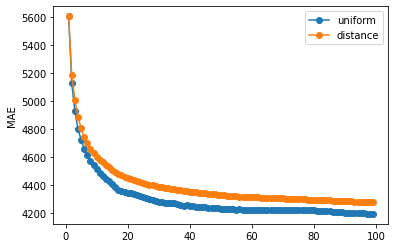

In [ ]:
cv = KFold(n_splits = 10, shuffle = False) # shuffle == false cause we have temporal variable

neigh_m = neigh_classi(cv, 30, 'manhattan')

## Prediction

Uniform strategy

In [ ]:
# constructor
n_neighbors = neigh_m[0]
weights = 'uniform'

knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights, metric = 'manhattan') 

# fit and predict
knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)


In [ ]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 4167.98071502356
MAPE: 0.748143795976226
MSE: 109423488.54863714
R^2: 0.026087506174709785


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



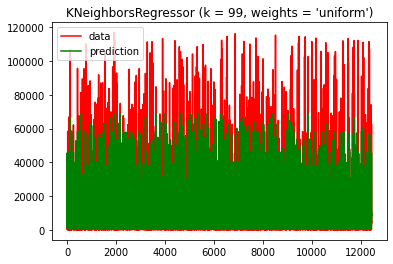

In [ ]:

import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')

plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()


## Decision Trees

No handles with labels found to put in legend.


Min Value : 4247.695104401557 (5)


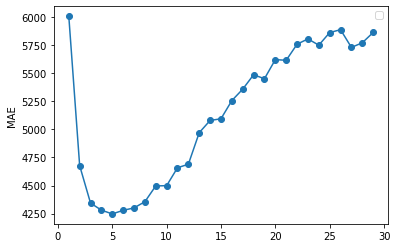

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

cv = KFold(n_splits = 5, shuffle = True)
total_scores = []
for i in range(1,30):
       fold_mae = []
       regr = tree.DecisionTreeRegressor(max_depth=i)
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
depth = np.argmin(total_scores) + 1
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

In [ ]:
from sklearn import tree
regr = tree.DecisionTreeRegressor(max_depth = depth)
regr.fit(X_train, y_train)
regr

DecisionTreeRegressor(max_depth=5)

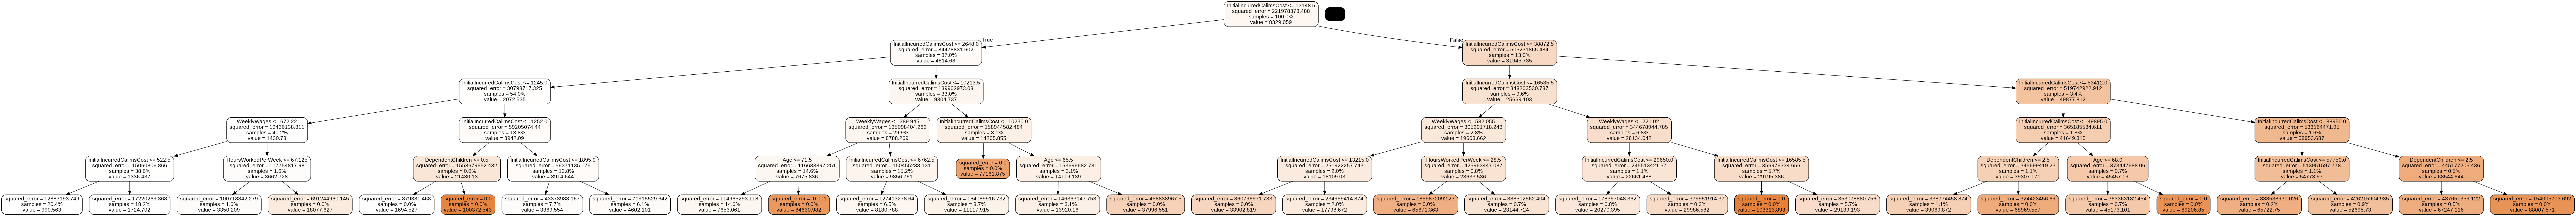

In [ ]:
import pydot
from IPython.display import Image

from io import StringIO

dot_data = StringIO()

tree.export_graphviz(regr, out_file = dot_data, proportion = True,
                     feature_names=['WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','HoursWorkedPerWeek'], 
                     rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','HoursWorkedPerWeek') ,
              'Decision Tree': regr.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,WeeklyWages,0.008486
1,InitialIncurredCalimsCost,0.980910
2,Age,0.004137
3,DependentChildren,0.004537
4,HoursWorkedPerWeek,0.001931


In [ ]:
y_pred = regr.predict(X_test)

In [ ]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 4205.884871462921
MAPE: 0.7329427787785927
MSE: 111663274.67843695
R^2: 0.02223673477660182


# 2. Optimized Model (RandomForests, Boosting + Hyperparameter Optimization)

## RandomForests

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 10, max_depth = depth, criterion='absolute_error', random_state=0)
#1.2 Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

# metrics calculation 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print ("Error Measure (MAE) ",  mae)

Error Measure (MAE)  3464.226813291459


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



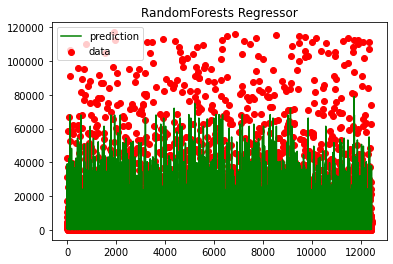

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('WeeklyWages', 'InitialIncurredCalimsCost','Age','DependentChildren','HoursWorkedPerWeek') ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,WeeklyWages,0.026418
1,InitialIncurredCalimsCost,0.968157
2,Age,0.003352
3,DependentChildren,0.001275
4,HoursWorkedPerWeek,0.000798


## Boosting + Hyperparameter Optimization

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
rng = np.random.RandomState(1)
# Fit regression model
regressors = []
regressors.append(DecisionTreeRegressor(max_depth=depth, criterion='absolute_error'))
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#
regressors.append(AdaBoostRegressor(DecisionTreeRegressor(max_depth=depth, criterion='absolute_error'),
                          n_estimators=50, random_state=rng))
#http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py                         
regressors.append(GradientBoostingRegressor(n_estimators=60, learning_rate=0.1,
                                   max_depth=depth, random_state=0, loss='squared_error'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.



Error Measure 3487.6333454341025


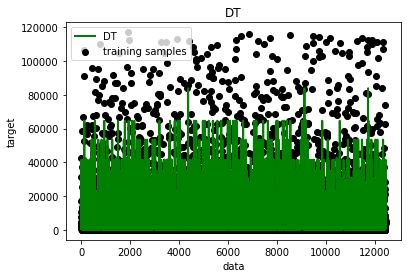

Error Measure 8803.639796575528


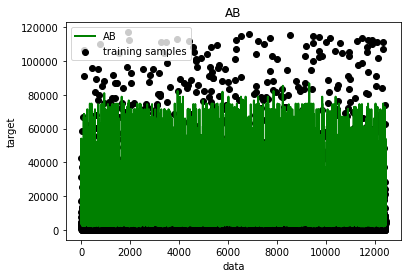

Error Measure 4161.190790150238


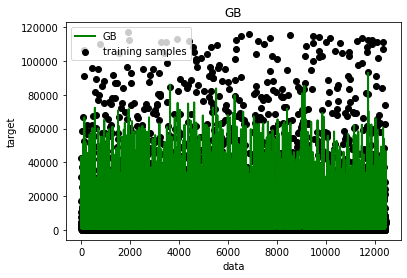

In [ ]:
xx = np.stack(i for i in range(len(y_test)))
regr_names = ["DT", "AB", "GB"]
               
for i, r in enumerate(regressors):
    r.fit(X_train, y_train)
    y = r.predict(X_test)
    print ("Error Measure", mean_absolute_error(y_test,y))
    # Plot the results
    plt.figure()
    plt.scatter(xx, y_test, c="k", label="training samples")
    plt.plot(xx, y, c="g", label=regr_names[i], linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title(regr_names[i])
    plt.axis('tight')
    plt.legend()
    plt.show()



# 3. Improvements (Include text data, other changes)